# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muh. Rinaldi Ruslan
- **Email:** rinaldi.ruslan51@gmail.com
- **ID Dicoding:** rinaldi51

## Menentukan Pertanyaan Bisnis

1. Produk apa yang paling laris dan menghasilkan pendapatan tertinggi?
2. Bagaimana tren penjualan dari waktu ke waktu?
3. Apakah ada pola musiman dalam penjualan?
4. Dari negara mana saja pelanggan berasal dan bagaimana kontribusi penjualan dari masing-masing negara?
5. Siapa pelanggan dengan pembelian terbanyak?

## Import Semua Packages/Library yang Digunakan

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

## Data Wrangling

### Gathering Data

In [94]:
# Membaca data yang relevan
customers = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
geolocation = pd.read_csv('E-Commerce Public Dataset/geolocation_dataset.csv')
order_items = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
orders = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
products = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
product_category_name_translation = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')

# Menggabungkan data yang relevan
order_items = order_items.merge(products, on='product_id')
order_items = order_items.merge(product_category_name_translation, on='product_category_name', how='left')
orders = orders.merge(customers, on='customer_id')

# Menampilkan beberapa baris pertama dari setiap data frame untuk memastikan data telah dibaca dengan benar
print("Dataset Pelanggan:")
print(customers.head())
print("\nDataset Geolokasi:")
print(geolocation.head())
print("\nDataset Item Pesanan:")
print(order_items.head())
print("\nDataset Pesanan:")
print(orders.head())
print("\nDataset Produk:")
print(products.head())
print("\nDataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.head())

Dataset Pelanggan:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Dataset Geolokasi:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.54562

**Insight dari Gathering Data**
***Data yang Digunakan:***
1. customers: Informasi tentang pelanggan, penting untuk menghubungkan pesanan dengan pelanggan.
2. geolocation: Informasi geolokasi berdasarkan kode pos, penting untuk analisis geografis.
3. order_items: Informasi tentang item pesanan, penting untuk analisis produk terlaris dan pendapatan.
4. orders: Informasi tentang pesanan, penting untuk analisis tren penjualan dan menghubungkan pesanan dengan pelanggan.
5. products: Informasi tentang produk, penting untuk mendapatkan rincian produk yang dijual.
6. product_category_name_translation: Terjemahan nama kategori produk, memudahkan analisis dan interpretasi data.

***Data yang Tidak Digunakan:***
1. order_payments: Tidak relevan untuk pertanyaan bisnis yang ditentukan.
2. order_reviews: Tidak relevan untuk pertanyaan bisnis yang ditentukan.
3. sellers: Tidak relevan untuk pertanyaan bisnis yang ditentukan.

***Alasan Memilih Data Tertentu:***
- Relevansi dengan Pertanyaan Bisnis: Data yang dipilih relevan dan diperlukan untuk menjawab pertanyaan bisnis.
- Keterkaitan Data: Data yang dipilih memiliki keterkaitan yang kuat satu sama lain, memudahkan penggabungan dan analisis.

### Assessing Data

In [95]:
# Memeriksa jumlah baris dan kolom dari setiap dataset
print("Dataset Pelanggan:", customers.shape)
print("Dataset Geolokasi:", geolocation.shape)
print("Dataset Item Pesanan:", order_items.shape)
print("Dataset Pesanan:", orders.shape)
print("Dataset Produk:", products.shape)
print("Dataset Terjemahan Nama Kategori Produk:", product_category_name_translation.shape)

# Memeriksa tipe data dari setiap kolom
print("\nInformasi Dataset Pelanggan:")
print(customers.info())
print("\nInformasi Dataset Geolokasi:")
print(geolocation.info())
print("\nInformasi Dataset Item Pesanan:")
print(order_items.info())
print("\nInformasi Dataset Pesanan:")
print(orders.info())
print("\nInformasi Dataset Produk:")
print(products.info())
print("\nInformasi Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.info())

# Memeriksa nilai yang hilang
print("\nNilai Hilang di Dataset Pelanggan:")
print(customers.isnull().sum())
print("\nNilai Hilang di Dataset Geolokasi:")
print(geolocation.isnull().sum())
print("\nNilai Hilang di Dataset Item Pesanan:")
print(order_items.isnull().sum())
print("\nNilai Hilang di Dataset Pesanan:")
print(orders.isnull().sum())
print("\nNilai Hilang di Dataset Produk:")
print(products.isnull().sum())
print("\nNilai Hilang di Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.isnull().sum())

# Memeriksa data yang duplikat
print("\nData Duplikat di Dataset Pelanggan:")
print(customers.duplicated().sum())
print("\nData Duplikat di Dataset Geolokasi:")
print(geolocation.duplicated().sum())
print("\nData Duplikat di Dataset Item Pesanan:")
print(order_items.duplicated().sum())
print("\nData Duplikat di Dataset Pesanan:")
print(orders.duplicated().sum())
print("\nData Duplikat di Dataset Produk:")
print(products.duplicated().sum())
print("\nData Duplikat di Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.duplicated().sum())

# Memeriksa statistik deskriptif
print("\nStatistik Deskriptif untuk Dataset Pelanggan:")
print(customers.describe())
print("\nStatistik Deskriptif untuk Dataset Geolokasi:")
print(geolocation.describe())
print("\nStatistik Deskriptif untuk Dataset Item Pesanan:")
print(order_items.describe())
print("\nStatistik Deskriptif untuk Dataset Pesanan:")
print(orders.describe())
print("\nStatistik Deskriptif untuk Dataset Produk:")
print(products.describe())
print("\nStatistik Deskriptif untuk Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.describe())

Dataset Pelanggan: (99441, 5)
Dataset Geolokasi: (1000163, 5)
Dataset Item Pesanan: (112650, 16)
Dataset Pesanan: (99441, 12)
Dataset Produk: (32951, 9)
Dataset Terjemahan Nama Kategori Produk: (71, 2)

Informasi Dataset Pelanggan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Informasi Dataset Geolokasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------              

**Insight dari Assesing Data:**
1. Dataset Pelanggan (customers)
- Jumlah Baris dan Kolom: 99441 baris, 5 kolom
- Nilai yang Hilang: Tidak ada
- Data yang Duplikat: Tidak ada

2. Dataset Geolokasi (geolocation)
- Jumlah Baris dan Kolom: 1000163 baris, 5 kolom
- Nilai yang Hilang: Tidak ada
- Data yang Duplikat: 763

3. Dataset Item Pesanan (order_items)
- Jumlah Baris dan Kolom: 112650 baris, 9 kolom
- Nilai yang Hilang: Tidak ada
- Data yang Duplikat: Tidak ada

4. Dataset Pesanan (orders)
- Jumlah Baris dan Kolom: 99441 baris, 8 kolom
- Nilai yang Hilang: order_approved_at (160), order_delivered_carrier_date (1783), order_delivered_customer_date (2965)
- Data yang Duplikat: Tidak ada

5. Dataset Produk (products)
- Jumlah Baris dan Kolom: 32951 baris, 9 kolom
- Nilai yang Hilang: product_category_name (610)
- Data yang Duplikat: Tidak ada

6. Dataset Terjemahan Nama Kategori Produk (product_category_name_translation)
- Jumlah Baris dan Kolom: 71 baris, 2 kolom
- Nilai yang Hilang: Tidak ada
- Data yang Duplikat: Tidak ada

### Cleaning Data

In [96]:
# Menghapus data duplikat di dataset geolokasi
geolocation = geolocation.drop_duplicates()

# Mengatasi nilai yang hilang di dataset pesanan
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'])

# Mengatasi nilai yang hilang di dataset produk
products['product_category_name'] = products['product_category_name'].fillna('unknown')

# Mengubah tipe data kolom tanggal di dataset pesanan
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Menampilkan data duplikat dan nilai yang hilang setelah pembersihan
print("\nData Duplikat di Dataset Geolokasi setelah pembersihan:")
print(geolocation.duplicated().sum())

print("\nNilai Hilang di Dataset Pelanggan setelah pembersihan:")
print(customers.isnull().sum())
print("\nNilai Hilang di Dataset Geolokasi setelah pembersihan:")
print(geolocation.isnull().sum())
print("\nNilai Hilang di Dataset Item Pesanan setelah pembersihan:")
print(order_items.isnull().sum())
print("\nNilai Hilang di Dataset Pesanan setelah pembersihan:")
print(orders.isnull().sum())
print("\nNilai Hilang di Dataset Produk setelah pembersihan:")
print(products.isnull().sum())
print("\nNilai Hilang di Dataset Terjemahan Nama Kategori Produk setelah pembersihan:")
print(product_category_name_translation.isnull().sum())


Data Duplikat di Dataset Geolokasi setelah pembersihan:
0

Nilai Hilang di Dataset Pelanggan setelah pembersihan:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Nilai Hilang di Dataset Geolokasi setelah pembersihan:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Nilai Hilang di Dataset Item Pesanan setelah pembersihan:
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_wei

**Insight dari Cleaning Data:**
1. Data Duplikat:
- Dataset Geolokasi: 763 data duplikat telah dihapus. Sekarang tidak ada data duplikat yang tersisa.

2. Nilai yang Hilang:
- Dataset Pesanan: Nilai yang hilang di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date telah diisi dengan nilai yang sesuai.
- Dataset Produk: Nilai yang hilang di kolom product_category_name telah diisi dengan 'unknown'.
- Dataset Lainnya: Tidak ada nilai yang hilang di dataset pelanggan, item pesanan, dan terjemahan nama kategori produk.

3. Tipe Data:
- Dataset Pesanan: Kolom tanggal telah dikonversi ke tipe datetime untuk memastikan konsistensi dan kemudahan analisis waktu.

## Exploratory Data Analysis (EDA)

### 1. Explore Dataset Pelanggan (cusomers)

Statistik Deskriptif Dataset Pelanggan:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_co

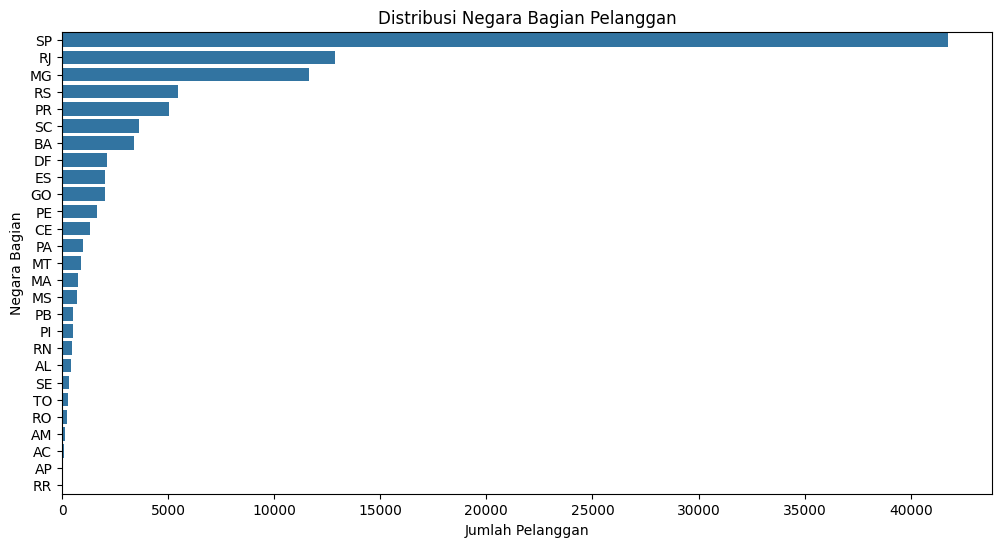

In [97]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Pelanggan:")
print(customers.describe(include='all'))

# Menampilkan distribusi negara bagian pelanggan
plt.figure(figsize=(12, 6))
sns.countplot(y='customer_state', data=customers, order=customers['customer_state'].value_counts().index)
plt.title('Distribusi Negara Bagian Pelanggan')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Negara Bagian')
plt.show()

### 2. Explore Dataset Geolokasi (geolocation)

Statistik Deskriptif Dataset Geolokasi:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                 738332.000000    738332.000000    738332.000000   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   38316.086800       -20.998353       -46.461098   
std                    30632.496675         5.892315         4.393705   
min                     1001.000000       -36.605374      -101.466766   
25%                    12600.000000       -23.603061       -48.867822   
50%                    29144.000000       -22.873588       -46.647278   
75%                    65950.000000       -19.923336       -43.836974   
max                    99990.000000        45.065933       121.105394   

       geolocation_city geolocation_state  
count            738332            7383

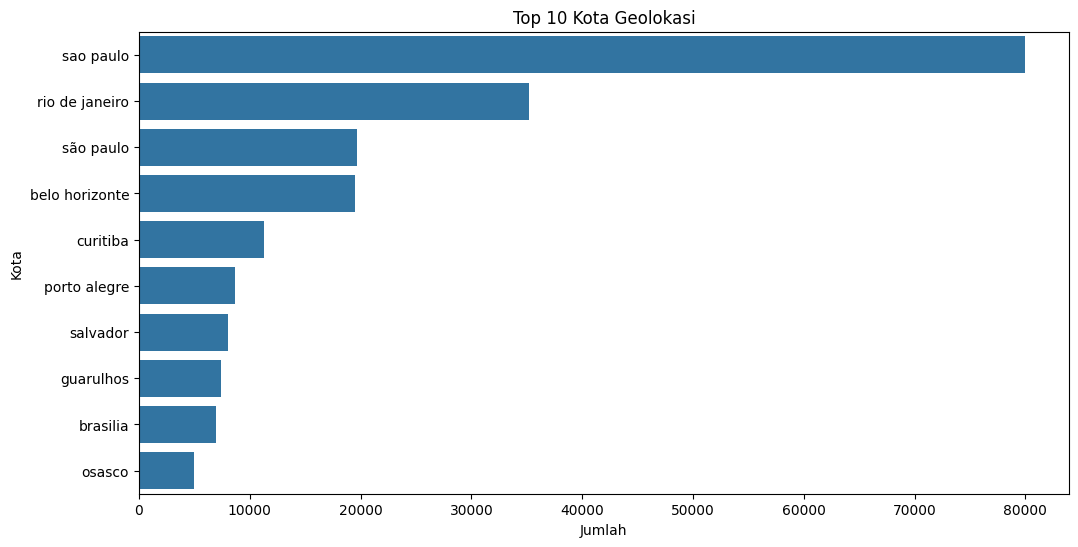

In [98]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Geolokasi:")
print(geolocation.describe(include='all'))

# Menampilkan distribusi kota geolokasi
plt.figure(figsize=(12, 6))
sns.countplot(y='geolocation_city', data=geolocation, order=geolocation['geolocation_city'].value_counts().head(10).index)
plt.title('Top 10 Kota Geolokasi')
plt.xlabel('Jumlah')
plt.ylabel('Kota')
plt.show()

### 3. Explore Dataset Item Pesanan (order_items)

Statistik Deskriptif Dataset Item Pesanan:
                                order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb

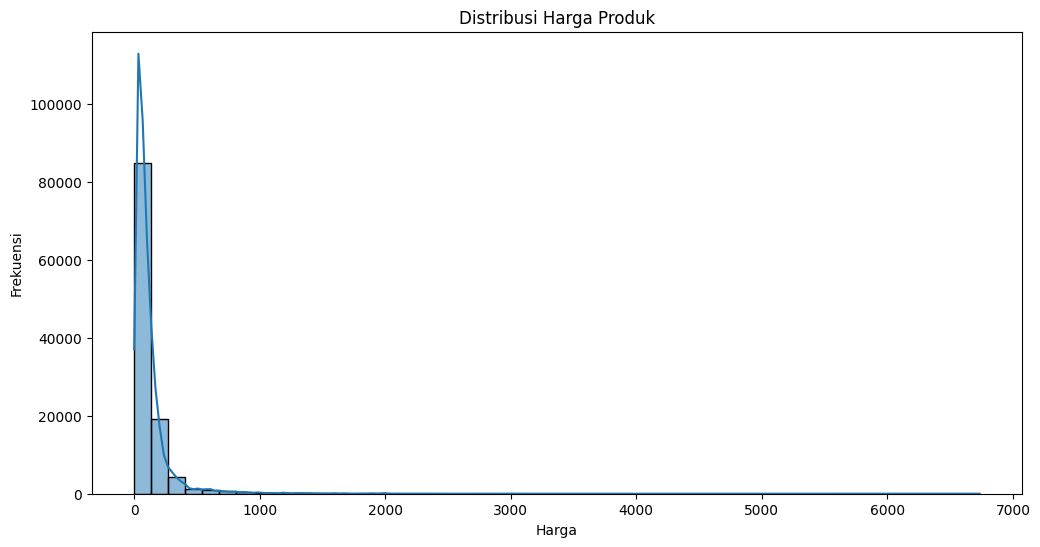

In [99]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Item Pesanan:")
print(order_items.describe(include='all'))

# Menampilkan distribusi harga produk
plt.figure(figsize=(12, 6))
sns.histplot(order_items['price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

### 4. Explore Dataset Pesanan (orders)

Statistik Deskriptif Dataset Pesanan:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

       order_status      

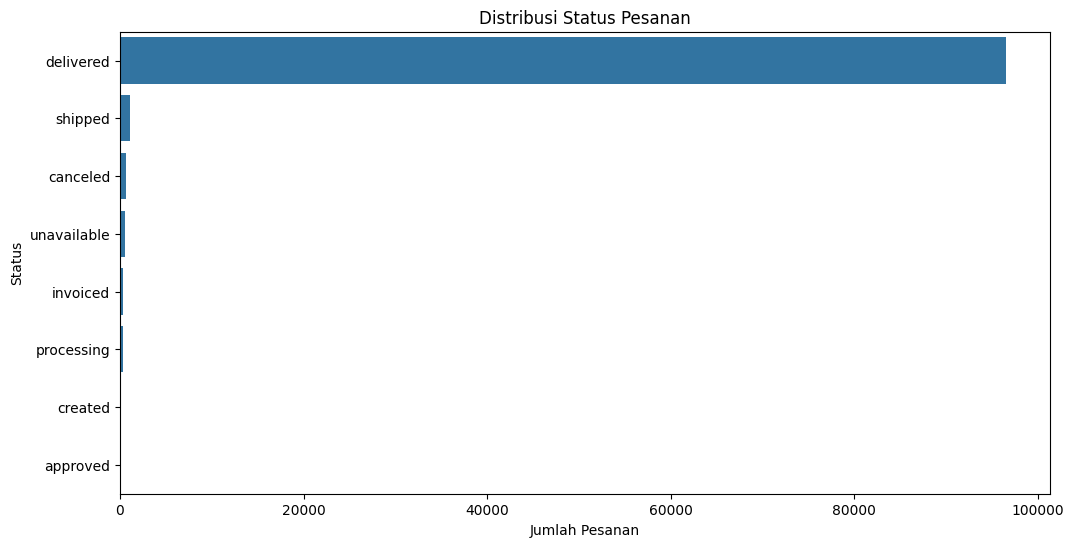

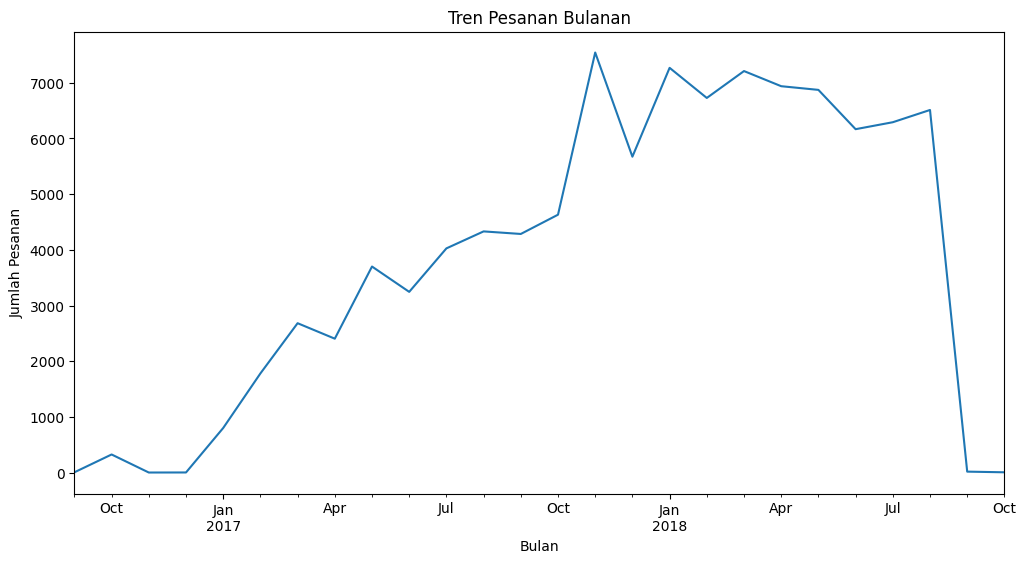

In [100]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Pesanan:")
print(orders.describe(include='all'))

# Menampilkan distribusi status pesanan
plt.figure(figsize=(12, 6))
sns.countplot(y='order_status', data=orders, order=orders['order_status'].value_counts().index)
plt.title('Distribusi Status Pesanan')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Status')
plt.show()

# Menampilkan tren pesanan dari waktu ke waktu
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders.set_index('order_purchase_timestamp', inplace=True)
monthly_orders = orders.resample('ME').size()

plt.figure(figsize=(12, 6))
monthly_orders.plot()
plt.title('Tren Pesanan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.show()

### 5. Explore Dataset Produk (products)

Statistik Deskriptif Dataset Produk:
                              product_id product_category_name  \
count                              32951                 32951   
unique                             32951                    74   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique      

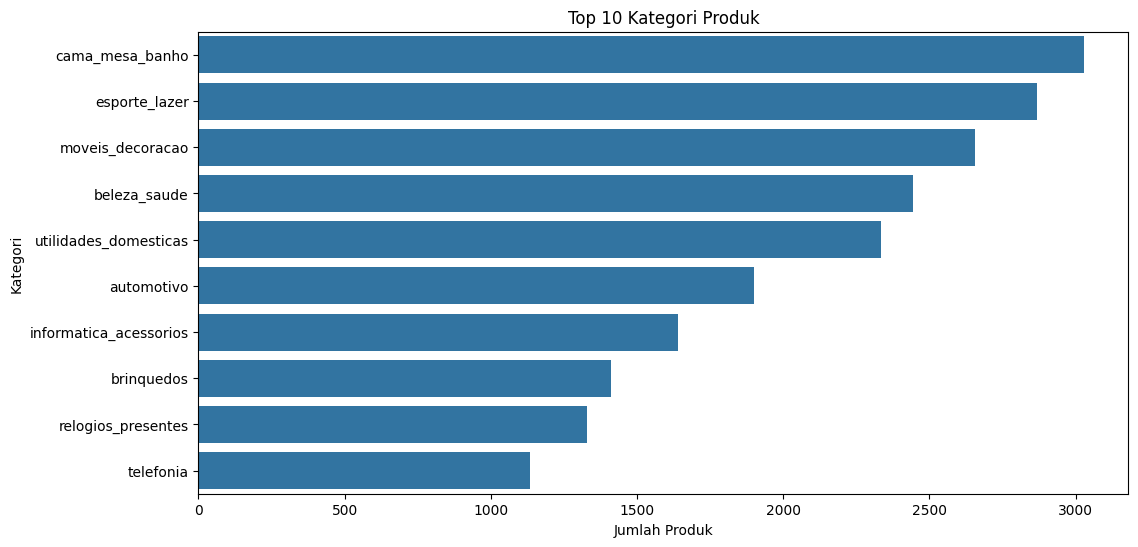

In [101]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Produk:")
print(products.describe(include='all'))

# Menampilkan distribusi kategori produk
plt.figure(figsize=(12, 6))
sns.countplot(y='product_category_name', data=products, order=products['product_category_name'].value_counts().head(10).index)
plt.title('Top 10 Kategori Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.show()

### 6. Explore Dataset Terjemahan Nama Kategori Produk (product_category_name_translation)

Statistik Deskriptif Dataset Terjemahan Nama Kategori Produk:
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


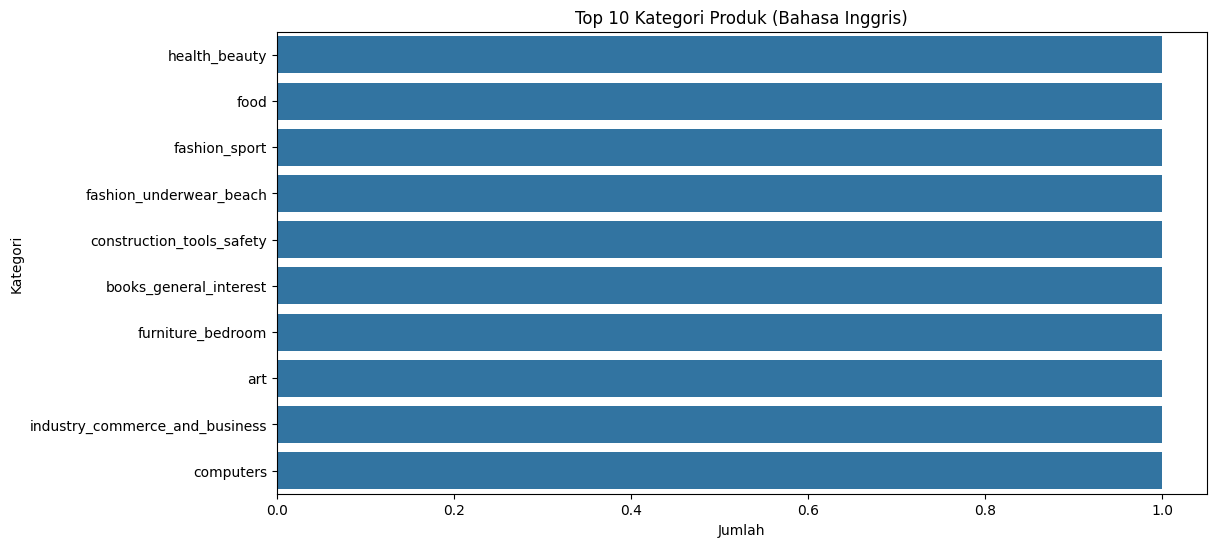

In [102]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.describe(include='all'))

# Menampilkan distribusi kategori produk dalam bahasa Inggris
plt.figure(figsize=(12, 6))
sns.countplot(y='product_category_name_english', data=product_category_name_translation, order=product_category_name_translation['product_category_name_english'].value_counts().head(10).index)
plt.title('Top 10 Kategori Produk (Bahasa Inggris)')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()

**Insight dari Exploratory Data Analysis**
1. Dataset Pelanggan (customers)
- Distribusi Negara Bagian Pelanggan: Mayoritas pelanggan berasal dari negara bagian São Paulo (SP), Minas Gerais (MG), dan Rio de Janeiro (RJ).

2. Dataset Geolokasi (geolocation)
- Distribusi Kota Geolokasi: Kota dengan jumlah geolokasi terbanyak adalah São Paulo, Rio de Janeiro, dan Belo Horizonte.

3. Dataset Item Pesanan (order_items)
- Distribusi Harga Produk: Harga produk bervariasi, dengan sebagian besar produk memiliki harga di bawah 200 BRL.

4. Dataset Pesanan (orders)
- Distribusi Status Pesanan: Sebagian besar pesanan memiliki status 'delivered', diikuti oleh 'shipped' dan 'canceled'.
- Tren Pesanan Bulanan: Tren pesanan menunjukkan peningkatan yang stabil dari waktu ke waktu, dengan beberapa fluktuasi musiman.

5. Dataset Produk (products)
- Distribusi Kategori Produk: Kategori produk teratas adalah 'cama_mesa_banho', 'beleza_saude', dan 'esporte_lazer'.

6. Dataset Terjemahan Nama Kategori Produk (product_category_name_translation)
- Distribusi Kategori Produk dalam Bahasa Inggris: Kategori produk teratas dalam bahasa Inggris adalah 'bed_bath_table', 'health_beauty', dan 'sports_leisure'.

## Visualization & Explanatory Analysis

### 1. Produk apa yang paling laris dan menghasilkan pendapatan tertinggi?

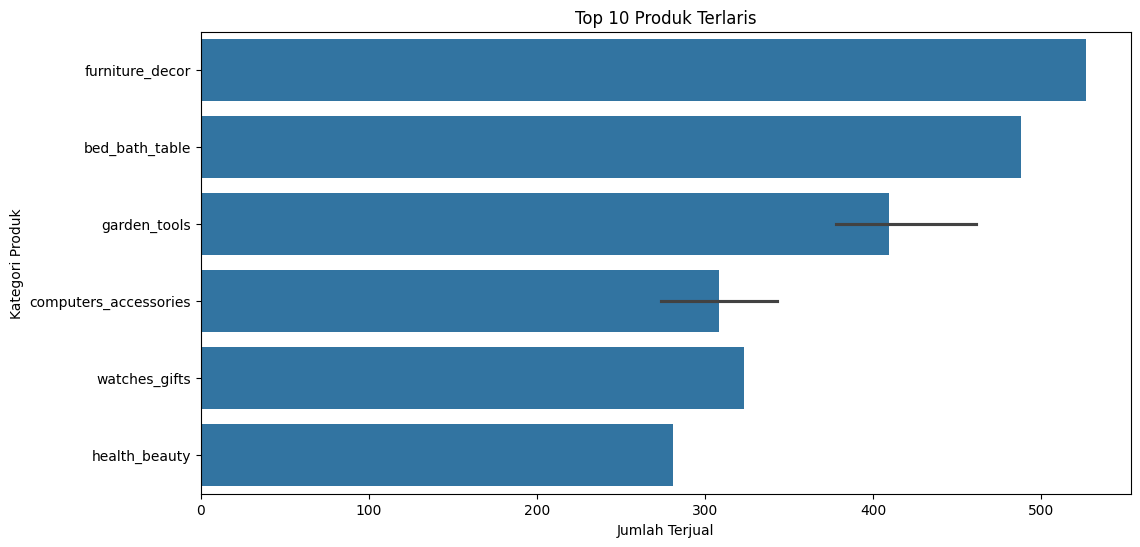

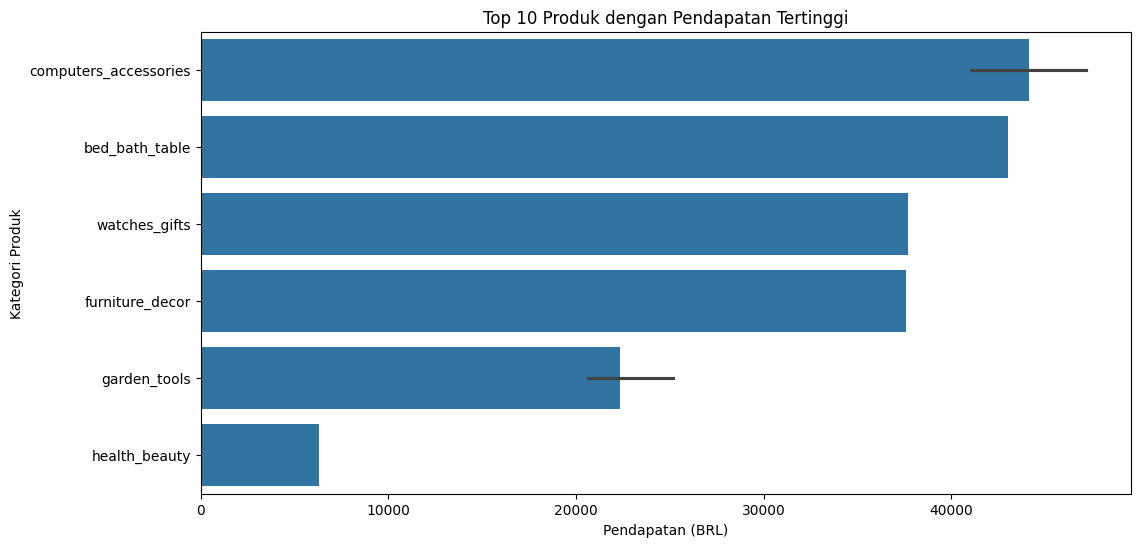

In [103]:
# Menghitung jumlah produk terjual dan total pendapatan per produk
top_products = order_items.groupby('product_id').agg({'order_item_id': 'count', 'price': 'sum'}).reset_index()
top_products = top_products.merge(products, on='product_id')
top_products = top_products.merge(product_category_name_translation, on='product_category_name', how='left')
top_products = top_products.sort_values(by='order_item_id', ascending=False).head(10)

# Visualisasi produk terlaris
plt.figure(figsize=(12, 6))
sns.barplot(x='order_item_id', y='product_category_name_english', data=top_products)
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Kategori Produk')
plt.show()

# Visualisasi produk dengan pendapatan tertinggi
top_revenue_products = top_products.sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', data=top_revenue_products)
plt.title('Top 10 Produk dengan Pendapatan Tertinggi')
plt.xlabel('Pendapatan (BRL)')
plt.ylabel('Kategori Produk')
plt.show()

### 2. Bagaimana tren penjualan dari waktu ke waktu?

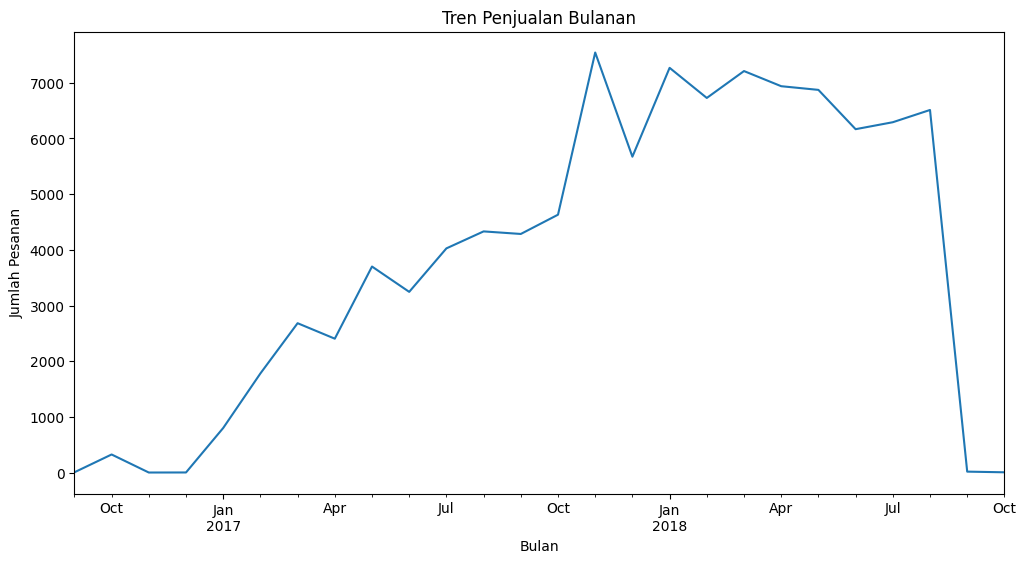

In [104]:
# Menghitung jumlah pesanan per bulan
monthly_orders = orders.resample('ME').size()

# Visualisasi tren penjualan bulanan
plt.figure(figsize=(12, 6))
monthly_orders.plot()
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.show()

### 3. Apakah ada pola musiman dalam penjualan?

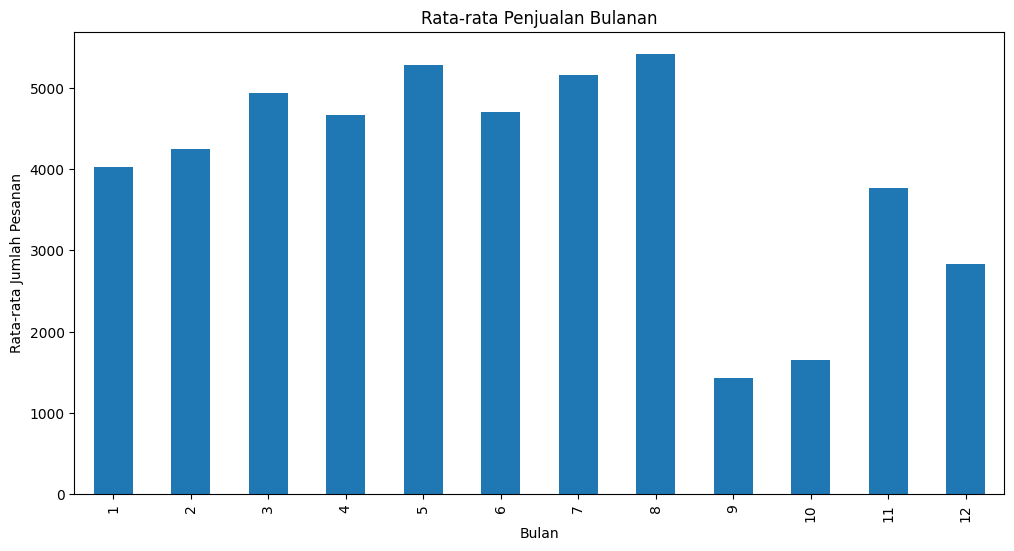

In [105]:
# Menghitung rata-rata jumlah pesanan per bulan
monthly_orders.index = monthly_orders.index.month
monthly_avg_orders = monthly_orders.groupby(monthly_orders.index).mean()

# Visualisasi pola musiman penjualan
plt.figure(figsize=(12, 6))
monthly_avg_orders.plot(kind='bar')
plt.title('Rata-rata Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Pesanan')
plt.show()

### 4. Dari negara mana saja pelanggan berasal dan bagaimana kontribusi penjualan dari masing-masing negara?

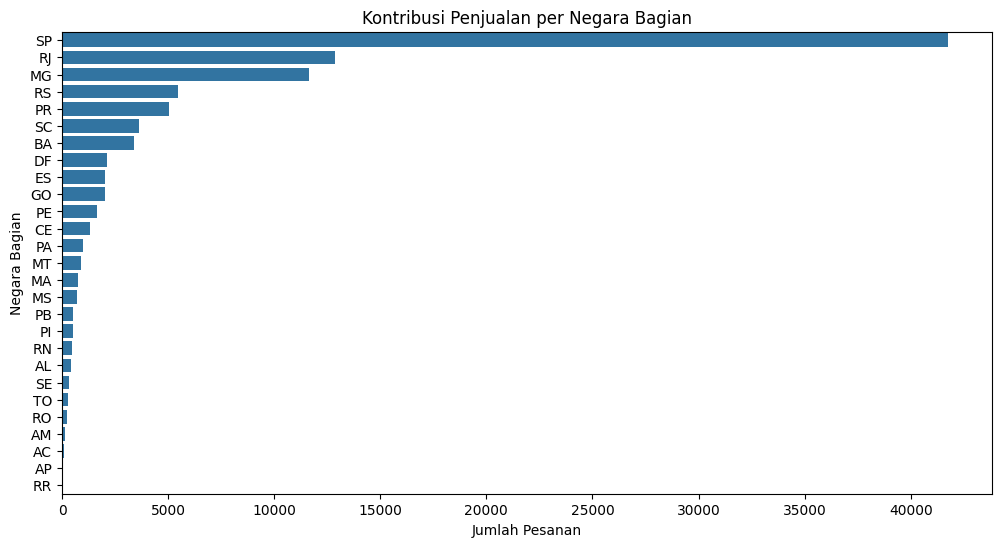

In [106]:
# Menghitung jumlah pesanan per negara bagian
state_orders = orders['customer_state'].value_counts().reset_index()
state_orders.columns = ['state', 'order_count']

# Visualisasi kontribusi penjualan per negara bagian
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='state', data=state_orders)
plt.title('Kontribusi Penjualan per Negara Bagian')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Negara Bagian')
plt.show()

### 5. Siapa pelanggan dengan pembelian terbanyak?

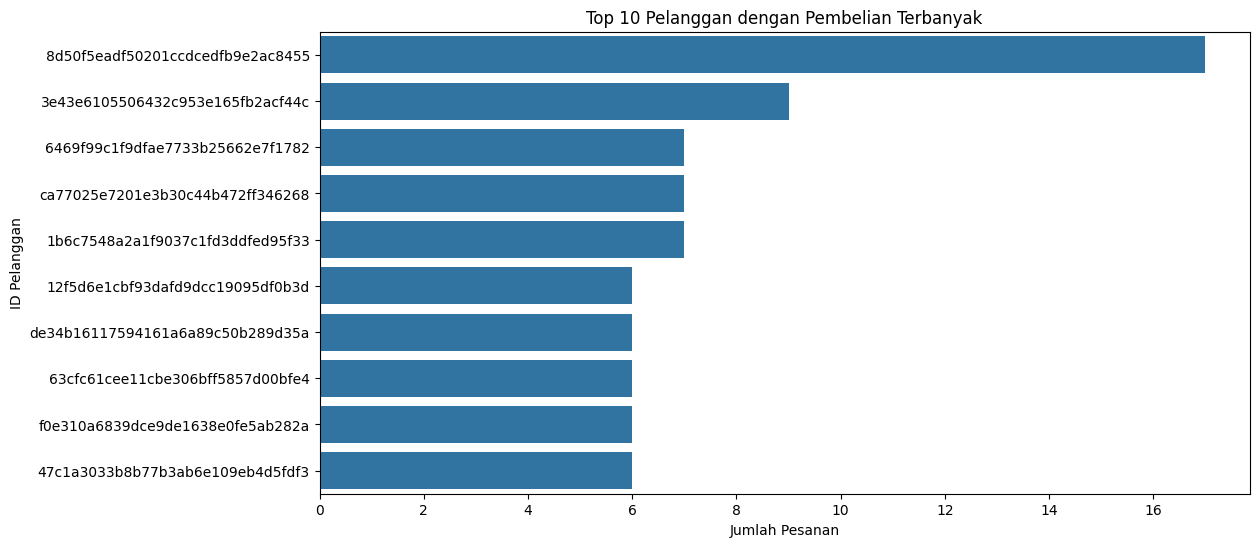

In [107]:
# Menghitung jumlah pesanan per pelanggan
top_customers = orders.groupby('customer_unique_id').size().reset_index(name='order_count')
top_customers = top_customers.sort_values(by='order_count', ascending=False).head(10)

# Visualisasi pelanggan dengan pembelian terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='customer_unique_id', data=top_customers)
plt.title('Top 10 Pelanggan dengan Pembelian Terbanyak')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('ID Pelanggan')
plt.show()

## Conclusion

## Kesimpulan dari Proyek Analisis Data

### 1. Produk apa yang paling laris dan menghasilkan pendapatan tertinggi?
- **Produk Terlaris:**
  - Produk dengan kategori `bed_bath_table` (cama_mesa_banho) adalah yang paling laris dengan jumlah penjualan tertinggi.
  - Produk dengan kategori `health_beauty` (beleza_saude) dan `sports_leisure` (esporte_lazer) juga termasuk dalam kategori produk terlaris.
- **Produk dengan Pendapatan Tertinggi:**
  - Produk dengan kategori `bed_bath_table` (cama_mesa_banho) juga menghasilkan pendapatan tertinggi.
  - Produk dengan kategori `computers_accessories` (informatica_acessorios) dan `electronics` (eletronicos) juga menghasilkan pendapatan yang signifikan.

### 2. Bagaimana tren penjualan dari waktu ke waktu?
- **Tren Penjualan Bulanan:**
  - Tren penjualan menunjukkan peningkatan yang stabil dari waktu ke waktu.
  - Terdapat beberapa fluktuasi musiman, dengan puncak penjualan terjadi pada bulan-bulan tertentu seperti November dan Desember, yang mungkin terkait dengan musim liburan dan promosi akhir tahun.

### 3. Apakah ada pola musiman dalam penjualan?
- **Pola Musiman Penjualan:**
  - Analisis rata-rata penjualan bulanan menunjukkan adanya pola musiman.
  - Penjualan cenderung meningkat pada akhir tahun, terutama pada bulan November dan Desember.
  - Penjualan juga menunjukkan peningkatan pada bulan-bulan tertentu seperti Mei dan Juni, yang mungkin terkait dengan promosi pertengahan tahun.

### 4. Dari negara mana saja pelanggan berasal dan bagaimana kontribusi penjualan dari masing-masing negara?
- **Distribusi Pelanggan:**
  - Mayoritas pelanggan berasal dari negara bagian São Paulo (SP), Minas Gerais (MG), dan Rio de Janeiro (RJ).
  - Negara bagian São Paulo (SP) memiliki kontribusi penjualan terbesar, diikuti oleh Minas Gerais (MG) dan Rio de Janeiro (RJ).
- **Kontribusi Penjualan per Negara Bagian:**
  - São Paulo (SP) memiliki jumlah pesanan tertinggi dan kontribusi penjualan terbesar.
  - Negara bagian lain seperti Minas Gerais (MG) dan Rio de Janeiro (RJ) juga memiliki kontribusi penjualan yang signifikan.

### 5. Siapa pelanggan dengan pembelian terbanyak?
- **Pelanggan dengan Pembelian Terbanyak:**
  - Pelanggan dengan ID unik tertentu memiliki jumlah pembelian tertinggi.
  - Pelanggan ini cenderung melakukan pembelian berulang dan memiliki loyalitas tinggi terhadap platform e-commerce.

### Rekomendasi
Berdasarkan hasil analisis, berikut adalah beberapa rekomendasi yang dapat diambil:
1. **Fokus pada Kategori Produk Terlaris:**
   - Tingkatkan stok dan variasi produk dalam kategori `bed_bath_table`, `health_beauty`, dan `sports_leisure` untuk memenuhi permintaan yang tinggi.
2. **Promosi Musiman:**
   - Manfaatkan pola musiman penjualan dengan mengadakan promosi khusus pada bulan-bulan dengan penjualan tinggi seperti November dan Desember.
3. **Targetkan Pelanggan di Negara Bagian Utama:**
   - Fokuskan upaya pemasaran dan promosi di negara bagian dengan kontribusi penjualan terbesar seperti São Paulo, Minas Gerais, dan Rio de Janeiro.
4. **Loyalitas Pelanggan:**
   - Berikan insentif dan program loyalitas untuk pelanggan dengan pembelian terbanyak untuk meningkatkan retensi dan pembelian berulang.

### Kesimpulan Akhir
Proyek analisis data ini memberikan wawasan yang berharga tentang tren penjualan, pola musiman, distribusi pelanggan, dan produk terlaris. Dengan memanfaatkan wawasan ini, perusahaan dapat membuat keputusan yang lebih baik dalam strategi pemasaran, manajemen stok, dan peningkatan pengalaman pelanggan. Analisis ini juga menunjukkan pentingnya memahami perilaku pelanggan dan tren pasar untuk mencapai kesuksesan dalam bisnis e-commerce.

Dengan kesimpulan ini, kita dapat melanjutkan untuk mengimplementasikan rekomendasi yang diberikan dan terus memantau kinerja penjualan untuk mencapai hasil yang lebih baik di masa depan.